Data Analytics

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
df = pd.read_csv('Fda_dataset.csv')
print(df.head())

   Unnamed: 0                   User  Age      Country   Platform  Day  Month  \
0           0            AbyssOfTime   32  Netherlands   Facebook   22     11   
1           1       AcceptanceSeeker   62       Canada   Facebook   16      2   
2           2       AdeleConcertGoer   51          USA  Instagram   15      9   
3           3  AdeleMelodyTearjerker   44           UK   Facebook   28     11   
4           4        AdventureAwaits   21          USA  Instagram   17      2   

   Year  Hour  Likes  Retweets  \
0  2016     9     45      22.0   
1  2023    18     30      15.0   
2  2022    20     80      40.0   
3  2019    19     60      30.0   
4  2023     7     40      20.0   

                                             Comment  \
0  Painful echoes of a love once cherished, now l...   
1  Finding acceptance in the midst of life's chal...   
2  At the front row of Adele's concert, each note...   
3  Immersed in the soulful melodies of Adele, tea...   
4  Anticipating a thrilling 

In [ ]:
# DATA PRE-PROCESSING
#Remove Irrelevant Columns
cleaned_df = df.drop(columns=['Unnamed: 0'])
cleaned_df['Timestamp'] = pd.to_datetime(cleaned_df['Timestamp'])

print(cleaned_df.head())

# Extract Date and Time separately
cleaned_df['Date'] = cleaned_df['Timestamp'].dt.date
cleaned_df['Time'] = cleaned_df['Timestamp'].dt.time

# Drop the original 'Timestamp' column
cleaned_df = cleaned_df.drop(columns=['Timestamp'])

# Display first few rows to verify the new columns
print(cleaned_df[['Date', 'Time']].head())

                    User  Age      Country   Platform  Day  Month  Year  Hour  \
0            AbyssOfTime   32  Netherlands   Facebook   22     11  2016     9   
1       AcceptanceSeeker   62       Canada   Facebook   16      2  2023    18   
2       AdeleConcertGoer   51          USA  Instagram   15      9  2022    20   
3  AdeleMelodyTearjerker   44           UK   Facebook   28     11  2019    19   
4        AdventureAwaits   21          USA  Instagram   17      2  2023     7   

   Likes  Retweets                                            Comment  \
0     45      22.0  Painful echoes of a love once cherished, now l...   
1     30      15.0  Finding acceptance in the midst of life's chal...   
2     80      40.0  At the front row of Adele's concert, each note...   
3     60      30.0  Immersed in the soulful melodies of Adele, tea...   
4     40      20.0  Anticipating a thrilling adventure in the comi...   

                   Hashtags  worlds  value_worlds     Sentiment  \
0  #Los

In [ ]:
# Missing values
missing_values = cleaned_df.isnull().sum()

# Display the cleaned data and missing value summary
cleaned_df.head(), missing_values

(                    User  Age      Country   Platform  Day  Month  Year  Hour  \
 0            AbyssOfTime   32  Netherlands   Facebook   22     11  2016     9   
 1       AcceptanceSeeker   62       Canada   Facebook   16      2  2023    18   
 2       AdeleConcertGoer   51          USA  Instagram   15      9  2022    20   
 3  AdeleMelodyTearjerker   44           UK   Facebook   28     11  2019    19   
 4        AdventureAwaits   21          USA  Instagram   17      2  2023     7   
 
    Likes  Retweets                                            Comment  \
 0     45      22.0  Painful echoes of a love once cherished, now l...   
 1     30      15.0  Finding acceptance in the midst of life's chal...   
 2     80      40.0  At the front row of Adele's concert, each note...   
 3     60      30.0  Immersed in the soulful melodies of Adele, tea...   
 4     40      20.0  Anticipating a thrilling adventure in the comi...   
 
                    Hashtags  worlds  value_worlds     Senti

In [ ]:
# Propose methods for handling missing values
cleaned_df['Retweets'] = cleaned_df['Retweets'].fillna(cleaned_df['Retweets'].mean())

In [ ]:
# Verify the changes
missing_values = cleaned_df.isnull().sum()
# Display the cleaned data and missing value summary
cleaned_df.head(), missing_values

(                    User  Age      Country   Platform  Day  Month  Year  Hour  \
 0            AbyssOfTime   32  Netherlands   Facebook   22     11  2016     9   
 1       AcceptanceSeeker   62       Canada   Facebook   16      2  2023    18   
 2       AdeleConcertGoer   51          USA  Instagram   15      9  2022    20   
 3  AdeleMelodyTearjerker   44           UK   Facebook   28     11  2019    19   
 4        AdventureAwaits   21          USA  Instagram   17      2  2023     7   
 
    Likes  Retweets                                            Comment  \
 0     45      22.0  Painful echoes of a love once cherished, now l...   
 1     30      15.0  Finding acceptance in the midst of life's chal...   
 2     80      40.0  At the front row of Adele's concert, each note...   
 3     60      30.0  Immersed in the soulful melodies of Adele, tea...   
 4     40      20.0  Anticipating a thrilling adventure in the comi...   
 
                    Hashtags  worlds  value_worlds     Senti

In [ ]:
# Check for duplicates
duplicates = cleaned_df.duplicated()

# Count duplicate rows
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicate rows
new_cleaned_df = cleaned_df.drop_duplicates()

# Verify the shape after removal
print(f"Shape after removing duplicates: {new_cleaned_df.shape}")

Number of duplicate rows: 9
Shape after removing duplicates: (750, 18)


In [ ]:
# Detect outliers using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(new_cleaned_df[['Likes', 'Retweets',]]))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


<ipython-input-239-fb5c39bcbb53>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cleaned_df['Date'] = pd.to_datetime(new_cleaned_df['Date'])
<ipython-input-239-fb5c39bcbb53>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cleaned_df['Month'] = new_cleaned_df['Date'].dt.month


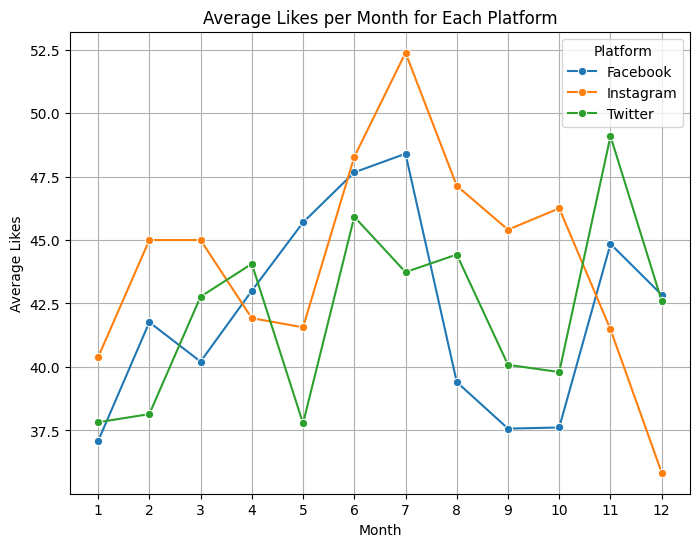

In [ ]:
# Visualization: Trend of Avg. Likes over Months/Platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Date' column to datetime objects if it's not already
new_cleaned_df['Date'] = pd.to_datetime(new_cleaned_df['Date'])

# Extract the month
new_cleaned_df['Month'] = new_cleaned_df['Date'].dt.month

# Unique platforms
platforms = new_cleaned_df['Platform'].unique()

# Create a line plot for each platform in the same figure
plt.figure(figsize=(8, 6))

for platform in platforms:
    platform_data = new_cleaned_df[new_cleaned_df['Platform'] == platform]
    likes_monthly = platform_data.groupby('Month')['Likes'].mean()

    # Plot the trend for each platform
    sns.lineplot(x=likes_monthly.index, y=likes_monthly.values, marker='o', label=platform)

plt.title('Average Likes per Month for Each Platform')
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.xticks(range(1, 13))
plt.legend(title="Platform")
plt.grid(True)
plt.show()

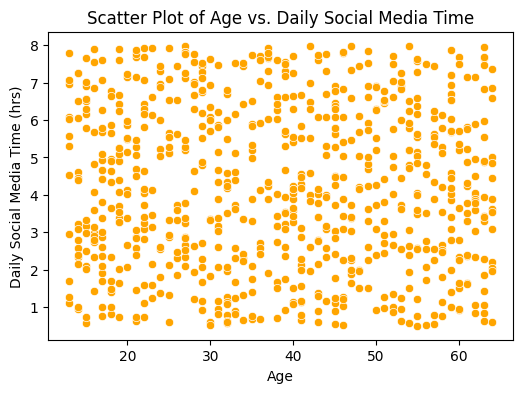

In [ ]:
# Scattter plot of age vs Daily Social Media Time (hrs)

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Daily Social Media Time (hrs)', data=new_cleaned_df, color='orange')
plt.title('Scatter Plot of Age vs. Daily Social Media Time')
plt.xlabel('Age')
plt.ylabel('Daily Social Media Time (hrs)')
plt.show()

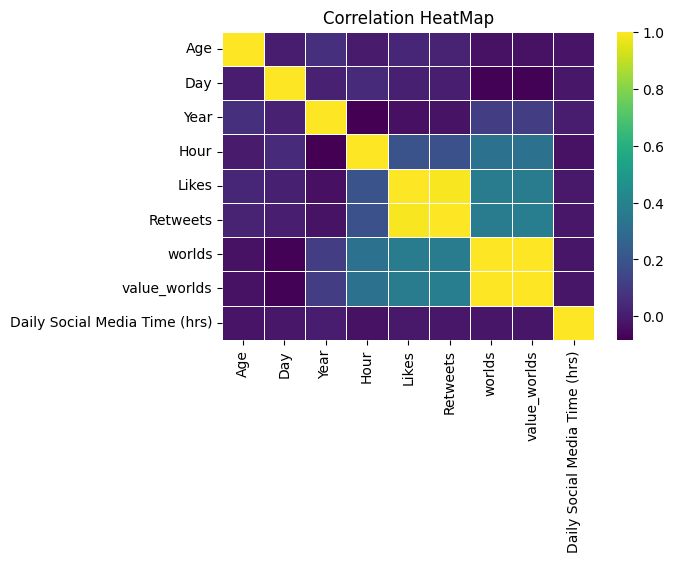

In [ ]:
# Correlation heatmap for numerical variables in the sampled dataset
numerical_features = new_cleaned_df.select_dtypes(include=["float64", "int64"])
corr_hmap = numerical_feat.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_hmap, annot=False, cmap="viridis",linewidth=.5,fmt='.2f')
plt.title("Correlation HeatMap")
plt.show()

In [ ]:
# Feature Selection
# Selecting key features for clustering
clustering_features = ["Likes", "Retweets", "Daily Social Media Time (hrs)","Age"]

In [ ]:
# Scaling the selected features using standard scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_cleaned_df[clustering_features])

In [ ]:
# Checking Elbow Method For K Means
wcss = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

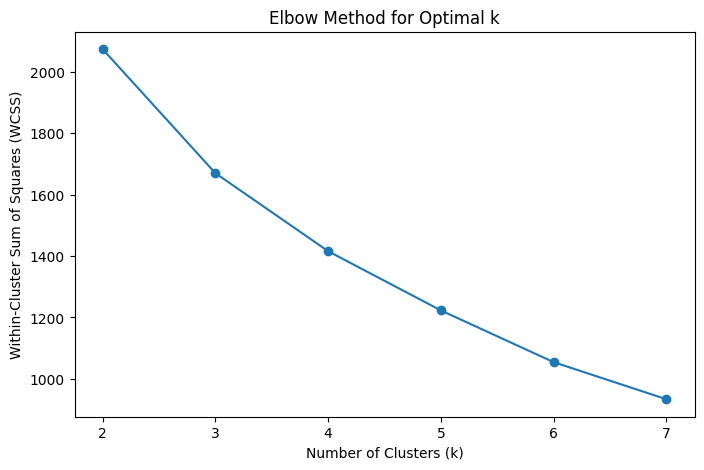

In [ ]:
# Plotting the Elbow Method
plt.figure(figsize=(, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the sampled dataframe
new_cleaned_df["Cluster"] = kmeans_labels

<ipython-input-256-7db304add58e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cleaned_df["Cluster"] = kmeans_labels


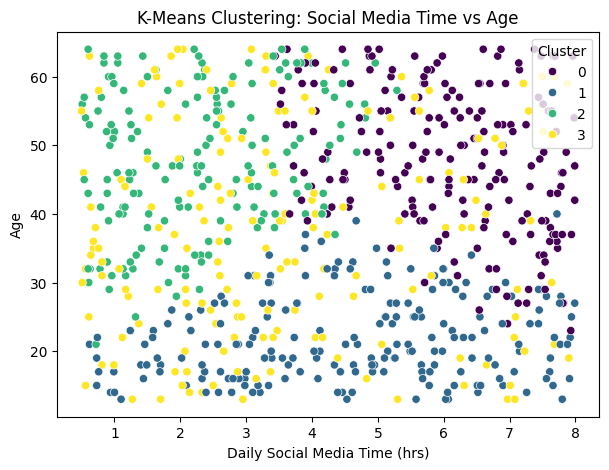

In [ ]:
# Visualizing clusters
plt.figure(figsize=(7, 5))
sns.scatterplot(x=new_cleaned_df["Daily Social Media Time (hrs)"],
                y=new_cleaned_df["Age"],hue=new_cleaned_df["Cluster"], palette="viridis")
plt.title("K-Means Clustering: Social Media Time vs Age")
plt.xlabel("Daily Social Media Time (hrs)")
plt.ylabel("Age")
plt.legend(title="Cluster")
plt.show()

In [ ]:
#Hierarchical clustering

hierarchical_linkage = linkage(scaled_data, method="complete")
hierarchical_labels = fcluster(hierarchical_linkage, t=4, criterion="maxclust")

# Assigning clusters from hierarchical clustering
hierarchical_labels = fcluster(hierarchical_linkage, t=4, criterion="maxclust")
new_cleaned_df["Hierarchical Cluster"] = hierarchical_labels

<ipython-input-248-407f51824bb1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cleaned_df["Hierarchical Cluster"] = hierarchical_labels


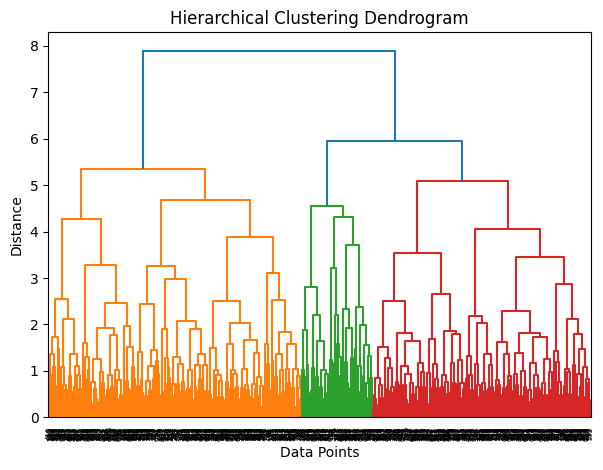

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(7, 5))
dendrogram(hierarchical_linkage)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Accuracy: Silhouette Score
# Higher Silhouette Score indicates better-defined clusters

# Select only numerical features for silhouette score calculation
numerical_features = new_cleaned_df.select_dtypes(include=np.number)

kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels) * 10
silhouette_hierarchical = silhouette_score(scaled_features, hierarchical_labels) * 10

print(f"\nAccuracy:\n")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.2f}")

# Robustness: Adjusted Rand Index (ARI) for stability
# Higher ARI indicates more stable clusters across different runs
print(f"\nRobustness:\n")
n_iterations = 10  # Number of iterations for K-Means
ari_scores = []

for i in range(n_iterations):
    kmeans_i = KMeans(n_clusters=4, random_state=i)
    labels_i = kmeans_i.fit_predict(scaled_data)
    ari = adjusted_rand_score(kmeans_labels, labels_i)
    ari_scores.append(ari)

avg_ari = np.mean(ari_scores)
print(f"Average Adjusted Rand Index (ARI): {avg_ari:.2f}")


# Number of iterations for testing
n_iterations = 10
ari_scores_hierarchical = []

# Loop through iterations
for i in range(n_iterations):
    # Perform hierarchical clustering with a different linkage matrix each time
    linkage_matrix_i = linkage(scaled_data, method='complete')
    labels_i = fcluster(linkage_matrix_i, t=4, criterion='maxclust')

    # Compare with the original hierarchical cluster labels
    ari = adjusted_rand_score(hierarchical_labels, labels_i)
    ari_scores_hierarchical.append(ari)

# Calculate and print the average ARI
avg_ari_hierarchical = np.mean(ari_scores_hierarchical)
print(f"Average Adjusted Rand Index (ARI) for Hierarchical Clustering: {avg_ari_hierarchical:.2f}")

print(f"\nSpeed:\n")
# Speed: Time taken for clustering
start_kmeans = time.time()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
end_kmeans = time.time()

start_hierarchical = time.time()
hierarchical_linkage = linkage(scaled_data, method="complete")
hierarchical_labels = fcluster(hierarchical_linkage, t=4, criterion="maxclust")
end_hierarchical = time.time()

print(f"K-Means Time Taken: {end_kmeans - start_kmeans:.2f} seconds")
print(f"Hierarchical Time Taken: {end_hierarchical - start_hierarchical:.2f} seconds")

print ( "\nScalability:\n")
# Scalability:
def test_clustering_scalability(data, clustering_features, sizes, n_clusters=4):
    results = []
    for size in sizes:
        # Sample a subset of the data
        subset = data.sample(n=size, random_state=42)

        # Impute missing values using the mean
        for feature in clustering_features:
            subset[feature] = subset[feature].fillna(subset[feature].mean())

        # Scale the subset data using StandardScaler
        scaler = StandardScaler()  # Initialize StandardScaler inside the loop
        scaled_subset = scaler.fit_transform(subset[clustering_features])

        # K-Means
        start_kmeans = time.time()
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(scaled_subset)
        end_kmeans = time.time()
        kmeans_time = end_kmeans - start_kmeans

        # Hierarchical
        start_hierarchical = time.time()
        hierarchical_linkage = linkage(scaled_subset, method="ward")
        hierarchical_labels = fcluster(hierarchical_linkage, t=n_clusters, criterion="maxclust")
        end_hierarchical = time.time()
        hierarchical_time = end_hierarchical - start_hierarchical

        results.append( {"Size": size,"KMeans Time": kmeans_time, "Hierarchical Time": hierarchical_time,})
    return pd.DataFrame(results)

# Define dataset sizes to test
sizes = [10, 250, 500, 750]

scaler = StandardScaler()
scalability_results = test_clustering_scalability(df, clustering_features, sizes)

print(scalability_results)

print ( "\nInterpretability:\n")
# Interpretability
hierarchical_cluster_summary = new_cleaned_df.groupby("Hierarchical Cluster")[
    clustering_features ].mean()
cluster_summary = new_cleaned_df.groupby("Cluster")[clustering_features].mean()

print("\nCluster Summary (Hierarchical Clustering):\n", hierarchical_cluster_summary)
print("\nCluster Summary (K-Means):\n", cluster_summary)



Accuracy:

K-Means Silhouette Score: 0.65
Silhouette Score for Hierarchical Clustering: 0.60

Robustness:

Average Adjusted Rand Index (ARI): 0.47
Average Adjusted Rand Index (ARI) for Hierarchical Clustering: 1.00

Speed:

K-Means Time Taken: 0.02 seconds
Hierarchical Time Taken: 0.04 seconds

Scalability:

   Size  KMeans Time  Hierarchical Time
0    10     0.003191           0.000467
1   250     0.004223           0.004498
2   500     0.005279           0.024789
3   750     0.017524           0.039529

Interpretability:


Cluster Summary (Hierarchical Clustering):
                           Likes   Retweets  Daily Social Media Time (hrs)  \
Hierarchical Cluster                                                        
1                     29.680328  15.032853                       3.730082   
2                     34.310044  17.207477                       4.697074   
3                     65.540816  32.836735                       4.630306   
4                     47.162791  23.687